In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
clinic_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
all_data = pd.merge(clinic_data, mouse_data, on='Mouse ID').sort_values(['Timepoint','Metastatic Sites']).reset_index(drop=True)
all_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_means = all_data.groupby(['Drug', 'Timepoint']).mean().reset_index()
tumor_means.pop('Metastatic Sites')
tumor_means.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_sems = all_data.groupby(['Drug', 'Timepoint']).sem().reset_index()
tumor_sems = tumor_sems[['Drug','Timepoint','Tumor Volume (mm3)']]
tumor_sems.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
# Minor Data Munging to Re-Format the Data Frames
tumor_means_pivot = pd.pivot_table(tumor_means, values=['Tumor Volume (mm3)'], index=['Timepoint'], columns=['Drug'])
tumor_means_pivot = tumor_means_pivot['Tumor Volume (mm3)']

tumor_sems_pivot = pd.pivot_table(tumor_sems, values=['Tumor Volume (mm3)'], index=['Timepoint'], columns=['Drug'])
tumor_sems_pivot = tumor_sems_pivot['Tumor Volume (mm3)']

# Preview that Reformatting worked
tumor_means_pivot


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [6]:
# Define data to chart
timepoints = tumor_means_pivot.index.tolist()
drug_list = tumor_means_pivot.columns.tolist()

x_axis = np.arange(0, len(timepoints))

tumor_means_t = ()
tumor_sems_t = ()

for drug in drug_list:
    tumor_means_t += (tumor_means_pivot[drug],)
    tumor_sems_t += (tumor_sems_pivot[drug],)

# Old code that manually lists drugs
# tumor_means_c = tumor_means_pivot[drug_list[0]]
# tumor_means_i = tumor_means_pivot[drug_list[2]]
# tumor_means_k = tumor_means_pivot[drug_list[3]]
# tumor_means_p = tumor_means_pivot[drug_list[5]]

# tumor_sems_c = tumor_sems_pivot[drug_list[0]]
# tumor_sems_i = tumor_sems_pivot[drug_list[2]]
# tumor_sems_k = tumor_sems_pivot[drug_list[3]]
# tumor_sems_p = tumor_sems_pivot[drug_list[5]]


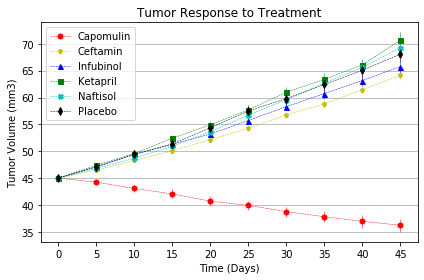

In [7]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()

plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, timepoints)

mstyle = ['o','p','^','s','X','d']
mcolor = ['r','y','b','g','c','k']

drug_handles = ()
counter = 0

for drug in drug_list:
    # Scatter plots
    ax.plot(x_axis, tumor_means_t[counter], label = drug_list, 
        color = mcolor[counter], marker = mstyle[counter], markersize = 5, linestyle = '--', linewidth = 0.5)
    # Error bars
    ax.errorbar(x_axis, tumor_means_t[counter], tumor_sems_t[counter], 
        color = mcolor[counter], linestyle = '', linewidth = 0.5)
    # Handles/labels for legend
    drug_handles += (drug,)
    counter += 1
    # Limit 6 to display on the chart
    if counter == 6:
        break

'''
# Old code that manually lists drugs
capomulin, = ax.plot(x_axis, tumor_means_c, 'or', markersize=5, label="Capomulin")
infubinol, = ax.plot(x_axis, tumor_means_i, '^b', markersize=5, label="Infubinol")
ketapril, = ax.plot(x_axis, tumor_means_k, 'sg', markersize=5, label="Ketapril")
placebo, = ax.plot(x_axis, tumor_means_p, 'dk', markersize=5, label="Placebo")

ax.errorbar(x_axis, tumor_means_c, tumor_sems_c, color='r', linestyle='--', linewidth=0.5)
ax.errorbar(x_axis, tumor_means_i, tumor_sems_i, color='b', linestyle='--', linewidth=0.5)
ax.errorbar(x_axis, tumor_means_k, tumor_sems_k, color='g', linestyle='--', linewidth=0.5)
ax.errorbar(x_axis, tumor_means_p, tumor_sems_p, color='k', linestyle='--', linewidth=0.5)

plt.legend(handles=[capomulin, infubinol, ketapril, placebo], loc='best')
'''

plt.legend(drug_handles, loc='best')
plt.grid(axis='y')
plt.tight_layout()

# Save the Figure
plt.savefig("Images/treatment.png")

# Show the Figure
plt.show()


## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
msite_means = all_data.groupby(['Drug', 'Timepoint']).mean()
msite_means.pop('Tumor Volume (mm3)')
msite_means.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
msite_sems = all_data.groupby(['Drug', 'Timepoint']).sem()
msite_sems = msite_sems[['Metastatic Sites']]
msite_sems.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [10]:
# Minor Data Munging to Re-Format the Data Frames
msite_means_pivot = pd.pivot_table(msite_means, values=['Metastatic Sites'], index=['Timepoint'], columns=['Drug'])
msite_means_pivot = msite_means_pivot['Metastatic Sites']

msite_sems_pivot = pd.pivot_table(msite_sems, values=['Metastatic Sites'], index=['Timepoint'], columns=['Drug'])
msite_sems_pivot = msite_sems_pivot['Metastatic Sites']

# Preview that Reformatting worked
msite_means_pivot


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [11]:
# Define data to chart
# timepoints = msite_means_pivot.index.tolist()
# drug_list = msite_means_pivot.columns.tolist()

x_axis = np.arange(0, len(timepoints))

msite_means_c = msite_means_pivot[drug_list[0]]
msite_means_i = msite_means_pivot[drug_list[2]]
msite_means_k = msite_means_pivot[drug_list[3]]
msite_means_p = msite_means_pivot[drug_list[5]]

msite_sems_c = msite_sems_pivot[drug_list[0]]
msite_sems_i = msite_sems_pivot[drug_list[2]]
msite_sems_k = msite_sems_pivot[drug_list[3]]
msite_sems_p = msite_sems_pivot[drug_list[5]]


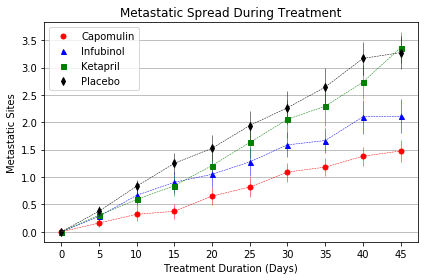

In [12]:
# Generate the Plot (with Error Bars)
fig2, ax2 = plt.subplots()

plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Metastatic Sites")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, timepoints)
                            
capomulin, = ax2.plot(x_axis, msite_means_c, 'or', markersize=5, label="Capomulin")
infubinol, = ax2.plot(x_axis, msite_means_i, '^b', markersize=5, label="Infubinol")
ketapril, = ax2.plot(x_axis, msite_means_k, 'sg', markersize=5, label="Ketapril")
placebo, = ax2.plot(x_axis, msite_means_p, 'dk', markersize=5, label="Placebo")

ax2.errorbar(x_axis, msite_means_c, msite_sems_c, color='r', linestyle='--', linewidth=0.5)
ax2.errorbar(x_axis, msite_means_i, msite_sems_i, color='b', linestyle='--', linewidth=0.5)
ax2.errorbar(x_axis, msite_means_k, msite_sems_k, color='g', linestyle='--', linewidth=0.5)
ax2.errorbar(x_axis, msite_means_p, msite_sems_p, color='k', linestyle='--', linewidth=0.5)

plt.legend(handles=[capomulin, infubinol, ketapril, placebo], loc='best')

plt.grid(axis='y')
plt.tight_layout()

# Save the Figure
plt.savefig("Images/spread.png")

# Show the Figure
plt.show()


## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_means = all_data.groupby(['Drug', 'Timepoint']).count()
mice_means = mice_means[['Mouse ID']].reset_index().rename(columns={'Mouse ID':'Mouse Count'})
mice_means.head()


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [14]:
# Minor Data Munging to Re-Format the Data Frames
mice_means_pivot = pd.pivot_table(mice_means, values=['Mouse Count'], index=['Timepoint'], columns=['Drug'])
mice_means_pivot = mice_means_pivot['Mouse Count'] 

# Preview that Reformatting worked
mice_means_pivot


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [15]:
# Define data to chart
# timepoints = mice_means_pivot.index.tolist()
# drug_list = mice_means_pivot.columns.tolist()

x_axis = np.arange(0, len(timepoints))

mice_means_c = mice_means_pivot[drug_list[0]]/mice_means_pivot[drug_list[0]][0]*100
mice_means_i = mice_means_pivot[drug_list[2]]/mice_means_pivot[drug_list[2]][0]*100
mice_means_k = mice_means_pivot[drug_list[3]]/mice_means_pivot[drug_list[3]][0]*100
mice_means_p = mice_means_pivot[drug_list[5]]/mice_means_pivot[drug_list[5]][0]*100


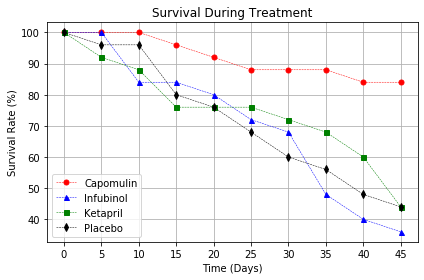

In [16]:
# Generate the Plot (Accounting for percentages)
fig, ax = plt.subplots()

plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, timepoints)
                            
capomulin, = ax.plot(x_axis, mice_means_c, 'or--', linewidth=0.5, markersize=5, label="Capomulin")
infubinol, = ax.plot(x_axis, mice_means_i, '^b--', linewidth=0.5, markersize=5, label="Infubinol")
ketapril, = ax.plot(x_axis, mice_means_k, 'sg--', linewidth=0.5, markersize=5, label="Ketapril")
placebo, = ax.plot(x_axis, mice_means_p, 'dk--', linewidth=0.5, markersize=5, label="Placebo")

plt.legend(handles=[capomulin, infubinol, ketapril, placebo], loc='best')

plt.grid()
plt.tight_layout()

# Save the Figure
plt.savefig("Images/survival.png")

# Show the Figure
plt.show()


## Summary Bar Graph

In [17]:
# Calculate the percent changes for each drug
tumor_changes = []

for drug in drug_list:
    tumor_change = (tumor_means_pivot[drug][45]-tumor_means_pivot[drug][0])/tumor_means_pivot[drug][0]*100
    tumor_changes.append(tumor_change)

# total_change = pd.Series(tumor_changes, drug_list)
total_change = pd.DataFrame(tumor_changes, drug_list)
total_change


,0
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134
Zoniferol,46.579751


In [18]:
# Store all Relevant Percent Changes into a Tuple
# tumor_tuple = tuple(zip(drug_list, tumor_changes))

# Splice the data between passing and failing drugs
bins = [-30,0,60]
labels = ["Pass","Fail"]
pass_fail = pd.cut(total_change[0], bins, labels=labels)
pass_fail

Capomulin    Pass
Ceftamin     Fail
Infubinol    Fail
Ketapril     Fail
Naftisol     Fail
Placebo      Fail
Propriva     Fail
Ramicane     Pass
Stelasyn     Fail
Zoniferol    Fail
Name: 0, dtype: category
Categories (2, object): [Pass < Fail]

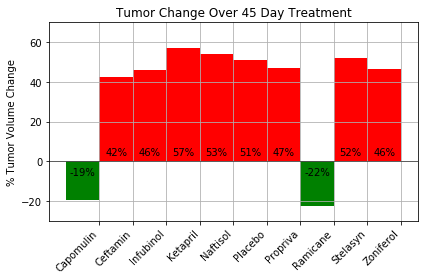

In [20]:
# Create figure and axes. Orient widths. Add labels, tick marks, etc. 
fig, ax = plt.subplots()
plt.title('Tumor Change Over 45 Day Treatment')
plt.ylabel('% Tumor Volume Change')

x_ticks = np.arange(len(tumor_changes))
ax.set_xticks(x_ticks)
ax.set_xticklabels(drug_list, rotation=45, horizontalalignment='right')

y_ticks = np.arange(-20,70,20)
ax.set_yticks(y_ticks)
plt.ylim(-30, 70)

plt.grid()
plt.axhline(linewidth=0.5, color='k')

# Use function to label the percentages of changes
def autolabel(rects):
    for rect in rects:
        bar_height = rect.get_height()
        
        # Formatting if change is negative or positive
        if bar_height <= 0:
            # bar_color.append('g')
            label_va = -7.0
        else:
            # bar_color.append('r')
            label_va = 3.0

        ax.text(rect.get_x() + rect.get_width()/2, label_va,
            str(int(bar_height))+"%", ha='center')

bar_color = []
for change in tumor_changes:
    if change <= 0:
        bar_color.append('g')
    else:
        bar_color.append('r')
        
# Plot data
percent_bars = ax.bar(x_ticks - 0.5, tumor_changes, width=1.0, color=bar_color)

# Call function to label the percentages of changes
autolabel(percent_bars)

# Save the Figure
plt.tight_layout()
plt.savefig('Images/change.png')

# Show the Figure
plt.show()


# Study Observations
1. There are two drugs that seemed to reduce tumor size and metastatic spread, plus increase survival rates over time - Capomulin and Ramicane. Within the study, they seemed to reduce tumor size around 19%-22% over a period of 45 days. Tumor size among the other drugs actually increased 42%-57% over the same period, including the Placebo (which may just indicate natural tumor growth). I would recommend moving Capomulin and Ramicane forward for further testing or approval to understand what differentiates these drugs from the others.<br /><br />
2. There are some drugs that seemed to slow tumor growth (compared to the Placebo). For example, Infubinol and Stelasyn slowed metastatic spread to less than 65% of the Placebo's spread. Metastatic sites after 45 days on Infunbinol averaged 2.11; Stelasyn averaged 1.73; Placebo averaged 3.27. However, neither significantly improved survival rates. We could do further study on many possible factors. What characteristics in these drugs allowed them to reduce metastatic spread? Was there anything different about the remaining cancer after Infubinol and Stelasyn versus Capomulin and Ramicane that ultimately caused fatality? Although most of the mice did not survive did they have a better quality of life?<br /><br />
3. Ketapril did not perform well in this study, particularly between day 40 and 45, when it actually resulted in slightly worse results than the Placebo. Tumor volume with Ketapril was consistently larger than with the Placebo, ending at 70.66mm<sup>3</sup> versus 68.08mm<sup>3</sup> respectively. Metastatic sites with Ketapril were lower until the end when they ultimately averaged 3.36 versus 3.27 with the Placebo. Survival rate with Ketapril was ultimately the same as the Placebo (11 out of 25 mice survived). It's possible that either the affects, if any, of Ketapril are not long-lasting or the cancer adjusted to the drug. In either case, this drug doesn't seem to have any long-term beneficial impact on cancer treatment.<br />